In [16]:
# ADF test
#  null hypothesis is that the series is non-stationary

"""
The more negative ADF Statistic is, the stronger the rejection of the null hypothesis (Non-Stationary)
"""
def ADF_test(X):
    print('------adf test------')
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [934]:
# KPSS test
# null hypothesis is that the series is stationary
# https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw): 
    print('-----kpss test------')
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    # print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    # print(f'num lags: {n_lags}')
    # print('Critial Values:')
    # for key, value in critical_values.items():
    #     print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [462]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

Text(0.5, 1.0, 'Stationary AR(1) Process')

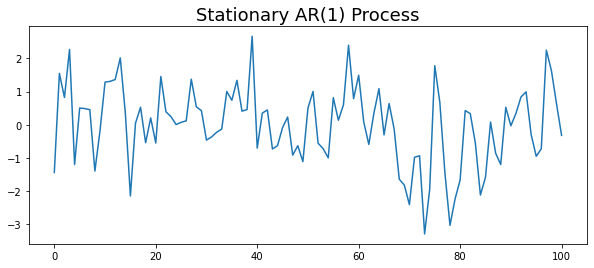

In [485]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

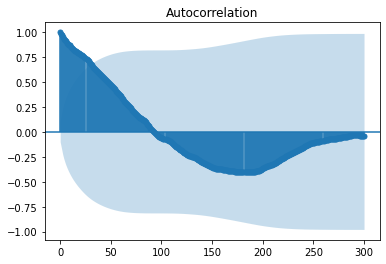

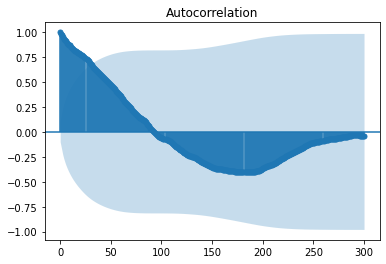

In [635]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ly, lags=300)

In [ ]:
Case 1: Both tests conclude that the given series is stationary – The series is stationary
Case 2: Both tests conclude that the given series is non-stationary – The series is non-stationary
Case 3: ADF concludes non-stationary and KPSS concludes stationary – The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.
Case 4: ADF concludes stationary and KPSS concludes non-stationary – The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

Trend stationary: The mean trend is deterministic. Once the trend is estimated and removed from the data, the residual series is a stationary stochastic process.

Difference stationary: The mean trend is stochastic. Differencing the series D times yields a stationary stochastic process.

Time series with a deterministic trend always revert to the trend in the long run (the effects of shocks are eventually eliminated). Forecast intervals have constant width.
Time series with a stochastic trend never recover from shocks to the system (the effects of shocks are permanent). Forecast intervals grow over time.

In [ ]:
# should we consider the non-working days in stationary tests?

In [ ]:
# adf returns nan p-value when the variance is zero.